## MonReader: Computer Vision Application to Classify Images

MonReader is a new mobile document digitization experience for the blind, for researchers and for everyone else in need for fully automatic, highly fast and high-quality document scanning in bulk. It is composed of a mobile app and all the user needs to do is flip pages and everything is handled by MonReader: it detects page flips from low-resolution camera preview and takes a high-resolution picture of the document, recognizing its corners and crops it accordingly, and it dewarps the cropped document to obtain a bird's eye view, sharpens the contrast between the text and the background and finally recognizes the text with formatting kept intact, being further corrected by MonReader's ML powered redactor.

### Data Description:

We collected page flipping video from smart phones and labelled them as flipping and not flipping.

We clipped the videos as short videos and labelled them as flipping or not flipping. The extracted frames are then saved to disk in a sequential order with the following naming structure: VideoID_FrameNumber

### Goal(s):

* Predict if the page is being flipped using a single image.

### Success Metrics:

* Evaluate model performance based on F1 score, the higher the better.

### Bonus(es):

* Predict if a given sequence of images contains an action of flipping.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Get Dataset

In [3]:
# Get training and testing dataset 
train_flip_dir="C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\training\\flip\\"
train_flip = os.listdir(train_flip_dir)

train_notflip_dir ="C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\training\\notflip\\"
train_notflip = os.listdir(train_notflip_dir)

test_flip_dir= "C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\testing\\flip\\"
test_flip = os.listdir(test_flip_dir)

test_notflip_dir = "C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\testing\\notflip\\"
test_notflip = os.listdir(test_notflip_dir)

In [4]:
#See the shape of each data folder
print('total training fliped images:', len(train_flip)) 
print('total training not fliped images:', len(train_notflip))
print('total testing fliped images:', len(test_flip))
print('total testing not fliped images:', len(test_notflip))

total training fliped images: 1162
total training not fliped images: 1230
total testing fliped images: 290
total testing not fliped images: 307


* Define the smaller dimension in our image dataset

In [5]:
# define empty lists to store shapes
height_list=[]
width_list=[]

In [6]:
for l in [test_flip_dir,train_flip_dir, train_notflip_dir, test_notflip_dir]:
    liste=os.listdir(l)
    for i in liste:
        filename = os.path.join(l,i)
        img = Image.open(filename)
        height_list.append(img.size[1])
        width_list.append(img.size[0])

In [7]:
print("the min height in the images data is:", min(height_list))
print("the min width in the images data is:", min(width_list))
print('------------------------------------------')
print("the max height in the images data is:", max(height_list))
print("the max width in the images data is:", max(width_list))

the min height in the images data is: 1920
the min width in the images data is: 1080
------------------------------------------
the max height in the images data is: 1920
the max width in the images data is: 1080


* Observation: The dimensions of images are mostly the same for all the images, however, we can unify the height and weight for all the images as 1080*1080. This will be done this in the preprocessing section.

In [8]:
#take a test image example 
test_img=test_flip_dir+test_flip[20]
img = Image.open(test_img)
img.size

(1080, 1920)

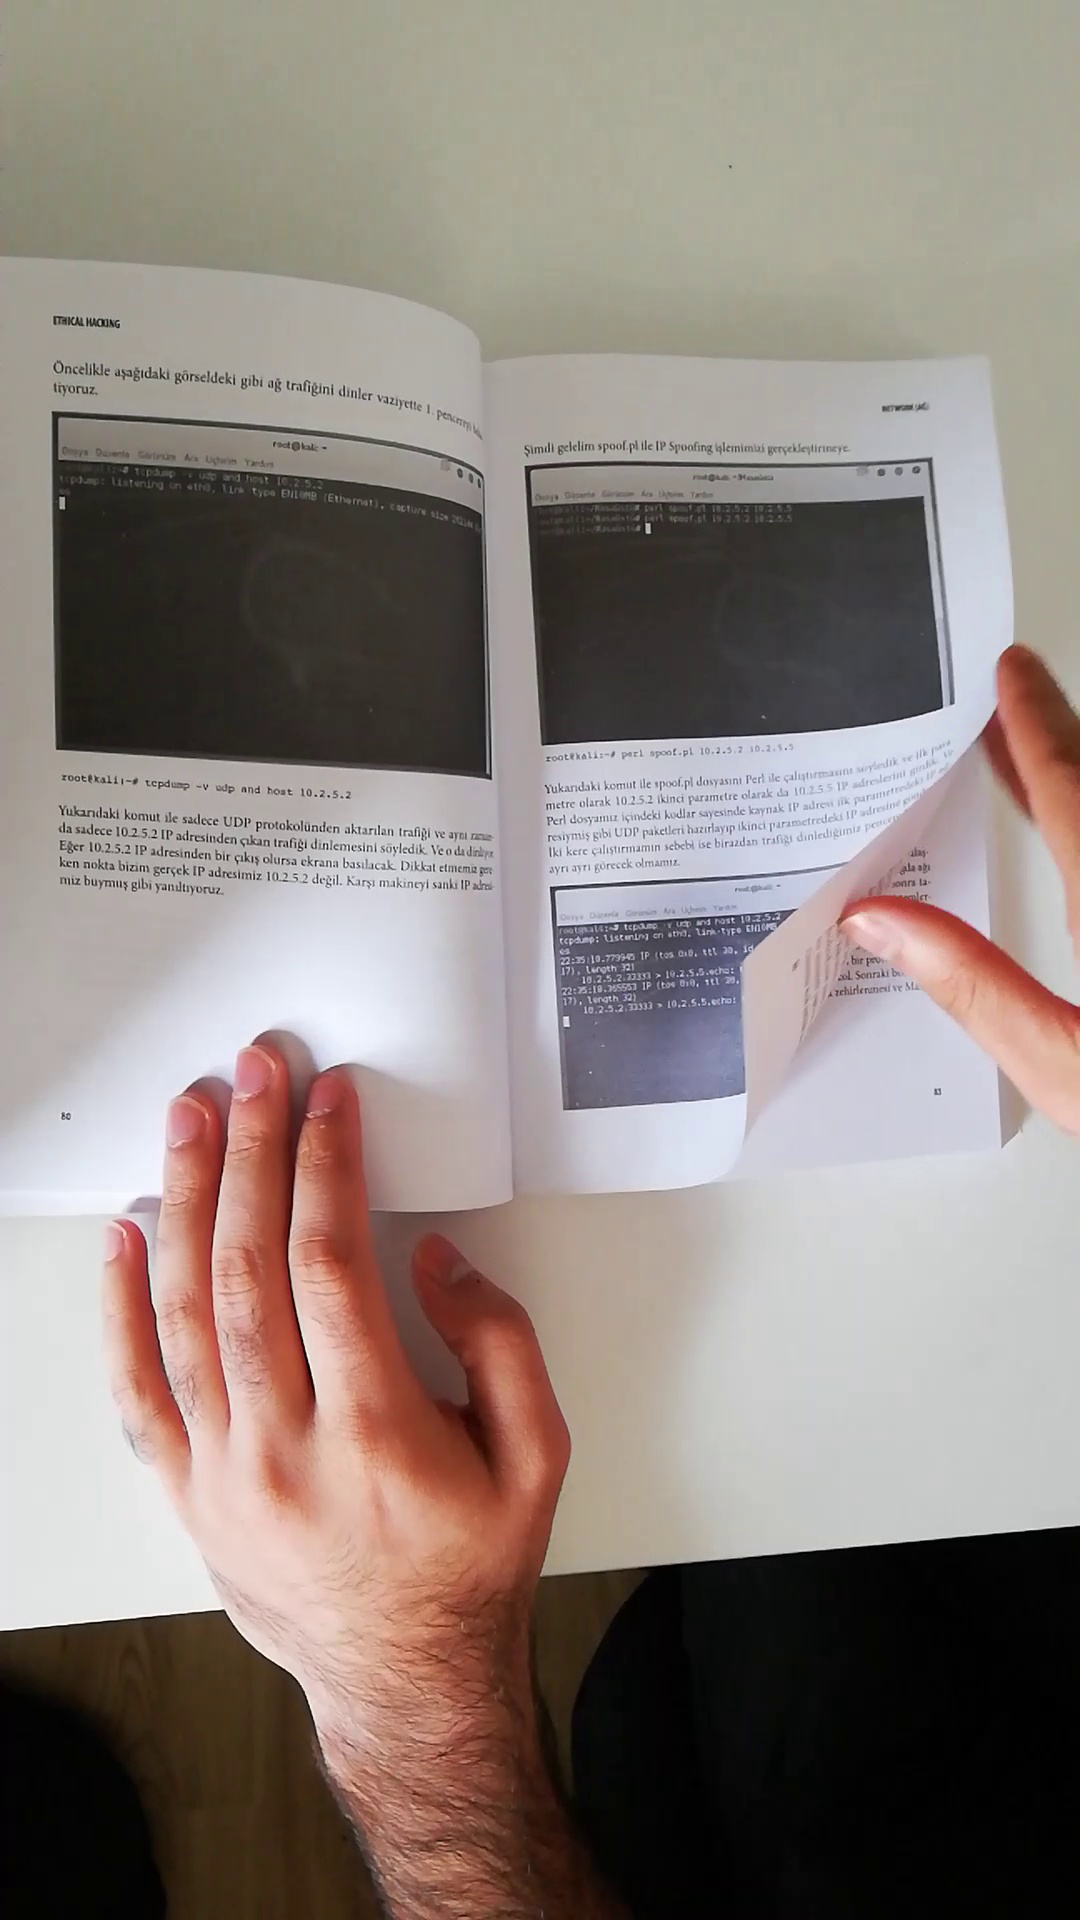

In [9]:
#see the original image
img

### Create and Splitting the dataset

In [10]:
X_noflip = np.array(train_notflip)
X_flip = np.array(train_flip)

#set 0 as flip and 1 as notflip
Y_noflip = np.ones(X_noflip.shape[0])
Y_flip = np.zeros(X_flip.shape[0])

X = np.concatenate((X_noflip,X_flip))
Y = np.concatenate((Y_noflip, Y_flip))

print(X.shape)
print(Y.shape)

(2392,)
(2392,)


In [11]:
# Let's take 10% for the validation dataset
X_train, X_val, Y_train, Y_val = train_test_split(X, Y , test_size = 0.1, random_state = 100)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((2152,), (240,), (2152,), (240,))

There is 240 images in the validation dataset and 2158 in training dataset

In [13]:
import shutil 

In [ ]:
#run this code for the first time only

'''os.mkdir('C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\valid')
valid_flip_dir='C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\valid\\flip'
valid_notflip_dir='C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\valid\\notflip'
os.mkdir(valid_flip_dir)
os.mkdir(valid_notflip_dir)
for i,j in zip(X_val,Y_val):
    if j ==0:# 0 --> flip
      shutil.move(train_flip_dir+i,valid_flip_dir)
    else:
      shutil.move(train_notflip_dir+i,valid_notflip_dir)
'''

In [17]:
#check size of folders
valid_flip_dir='C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\valid\\flip\\'
valid_notflip_dir='C:\\Users\\Dorcas Taiwo\\Documents\\AI_Residency_Projects\\Project4\\sYK4raA4xabgaLi9\\data\\raw\\images\\valid\\notflip\\'
print(f'there are {len(os.listdir(valid_flip_dir))} images in the flip validation dataset')
print(f'there are {len(os.listdir(valid_notflip_dir))} images in the notflip validation dataset')
print('--------------> total valid is:',len(os.listdir(valid_flip_dir))+len(os.listdir(valid_notflip_dir)))

there are 113 images in the flip validation dataset
there are 127 images in the notflip validation dataset
--------------> total valid is: 240


AttributeError: 'str' object has no attribute 'numpy'

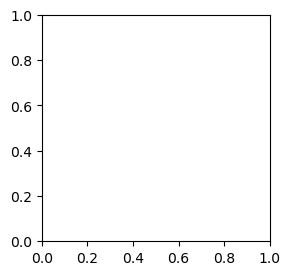

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images in X_train.take(1):
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

### Data preprocessing

In [28]:
#set the minimum size as a base for further cropping
base_size=(1080,1080)

In [19]:
#see the image after cropping it
cropped_img=transforms.CenterCrop(size=base_size)(img)
cropped_img

NameError: name 'transforms' is not defined

In [29]:
batch_size = 32
img_height = 1080
img_width = 1080

In [30]:
class_names = Y_train.class_names
print(class_names)

AttributeError: 'numpy.ndarray' object has no attribute 'class_names'

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_flip_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory C:\Users\Dorcas Taiwo\Documents\AI_Residency_Projects\Project4\sYK4raA4xabgaLi9\data\raw\images\training\flip\. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')